# EDA with Python and applying Logistic Regression

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
train = pd.read_csv('titanic.csv')

In [112]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


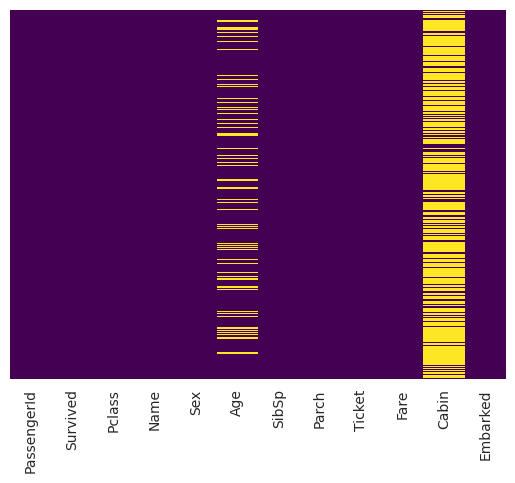

In [116]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [118]:
sns.set_style('whitegrid')

In [120]:
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

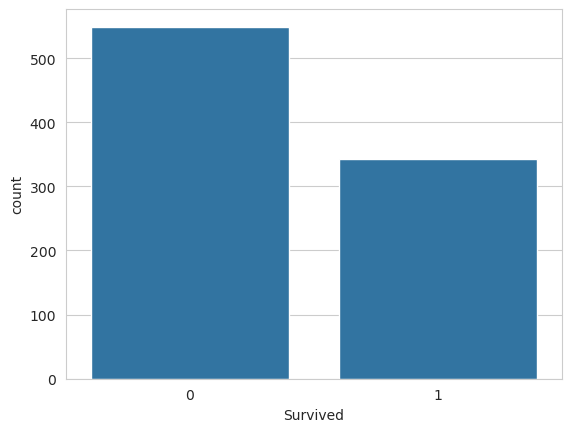

In [122]:
plt.show()

In [124]:
sns.set_style('whitegrid')

In [126]:
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

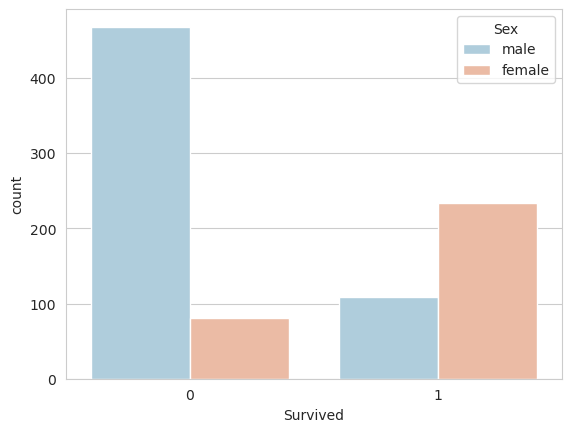

In [128]:
plt.show()

In [130]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train, palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

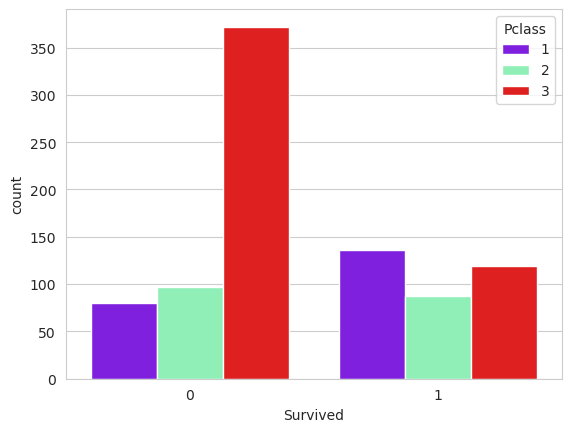

In [14]:
plt.show()

In [15]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

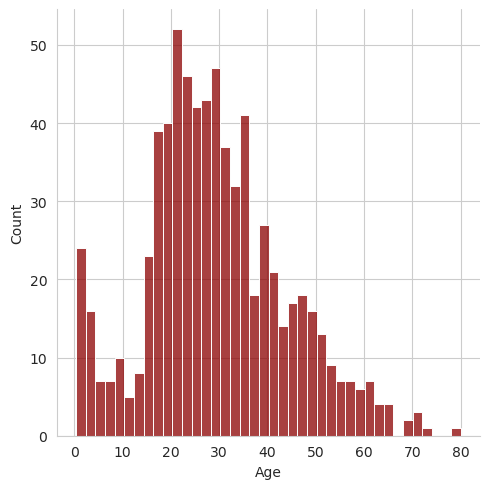

In [16]:
plt.show()

In [17]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: >

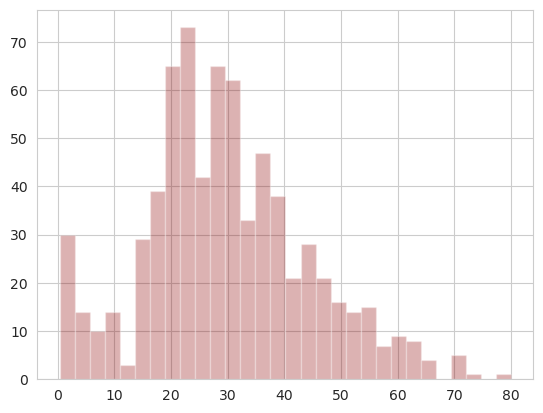

In [18]:
plt.show()

In [19]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='SibSp', ylabel='count'>

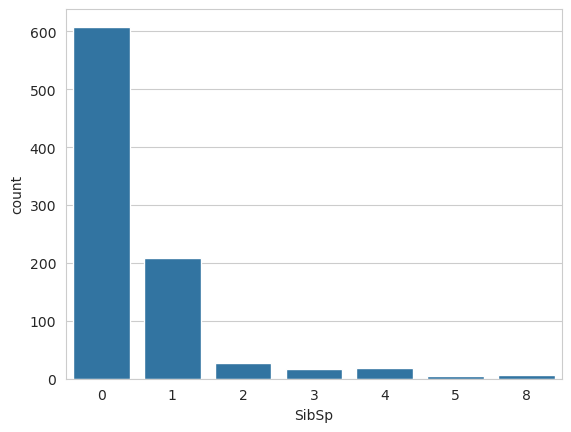

In [20]:
plt.show()

### Data Cleaning

 We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class

In [23]:
plt.figure(figsize=(12,7))

<Figure size 1200x700 with 0 Axes>

In [132]:
sns.boxplot(hue='Pclass',y='Age',data=train,palette='winter',legend=False)

<Axes: xlabel='Survived', ylabel='count'>

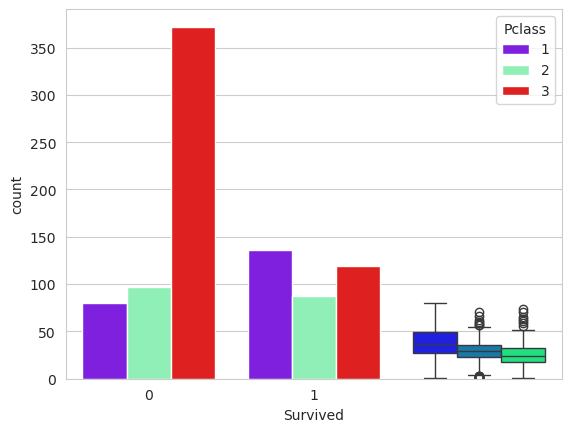

In [134]:
plt.show()

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [137]:
import pandas as pd

def impute_age(cols):
    Age,Pclass = cols['Age'],cols['Pclass']

    if pd.isna(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

conditions = [
    (train['Age'].isna()) & (train['Pclass']==1),
    (train['Age'].isna()) & (train['Pclass']==2),
    (train['Age'].isna()) & (train['Pclass']==3)
]
choices = [37,29,24]
train['Age'] = np.where(train['Age'].isna(),
                        np.select(conditions, choices, default=24),
                        train['Age'])

In [139]:
sns.heatmap(train.isna(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

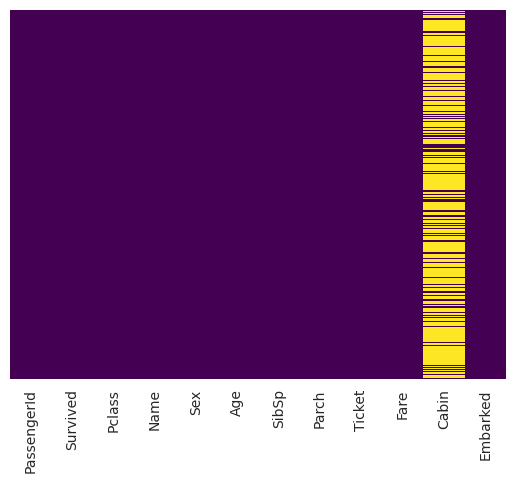

In [141]:
plt.show()

In [143]:
train.drop('Cabin',axis=1,inplace=True)

In [145]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


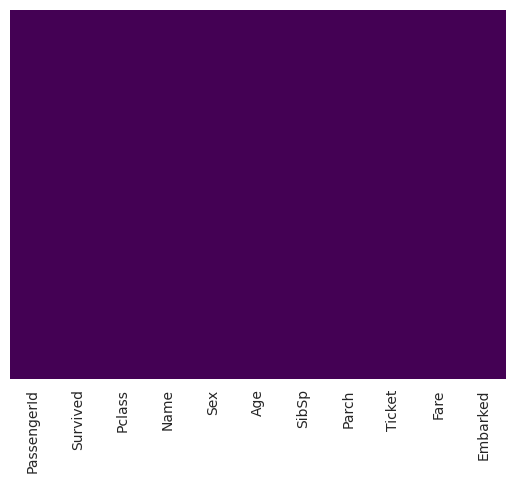

In [147]:
sns.heatmap(train.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [149]:
train.dropna(inplace=True)

Great.........

### Converting Categorical Feartures

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [156]:
pd.get_dummies(train['Embarked'],drop_first=True).astype(int)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [158]:
sex = pd.get_dummies(train['Sex'],drop_first=True).astype(float)
embark = pd.get_dummies(train['Embarked'],drop_first=True).astype(float)

In [160]:
sex
embark

,Q,S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,0.0,1.0
888,0.0,1.0
889,0.0,0.0


In [162]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [164]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [166]:
train = pd.concat([train,sex,embark],axis=1)

In [168]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


Great our data is ready for our model......

### Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

In [209]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0.0,1.0
887,888,1,1,19.0,0,0,30.0000,0.0,0.0,1.0
888,889,0,3,24.0,1,2,23.4500,0.0,0.0,1.0
889,890,1,1,26.0,0,0,30.0000,1.0,0.0,0.0


In [217]:
X = train.drop('Survived', axis=1)
y = train['Survived']


In [219]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [227]:
predictions = logmodel.predict(X_test)


In [239]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


Confusion Matrix:
[[92 17]
 [24 45]]


In [241]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predictions))



Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       109
           1       0.73      0.65      0.69        69

    accuracy                           0.77       178
   macro avg       0.76      0.75      0.75       178
weighted avg       0.77      0.77      0.77       178



In [231]:
from sklearn.metrics import accuracy_score

In [233]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7696629213483146

In [235]:
predictions

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0])

76% accuracy is not so bad for the first simple model